This notebook contains:

1. Importing libraries and data and renaming columns

2. The elbow technique

3. k-means clustering

4. Visualisations

5. Stats, conclusons and points for further analysis


Importing libraries

In [1]:
# Importing Analitycal and Visual libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

Establishing a path and importing the dataframe

In [3]:
path = r'C:\Users\Paola\Desktop\Shaul\Data\CF\Data Immersion\Achievement 6\Uber October-2023 Basket Analysis'

In [4]:
path

'C:\\Users\\Paola\\Desktop\\Shaul\\Data\\CF\\Data Immersion\\Achievement 6\\Uber October-2023 Basket Analysis'

In [5]:
# Following observations from previous notebooks, trip fare has been limited to $15 in order not to skew the data.

df = pd.read_csv(os.path.join(path, '2-Data', 'Prepared Data', 'uber_limited_to_usd15_trips.csv'), index_col = False)

In [6]:
df.shape

(75254, 29)

In [7]:
df.columns

Index(['VendorID', 'pickup_date', 'pickup_time', 'dropoff_date',
       'dropoff_time', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'Trip category',
       'Fare category', 'pickup_time_new', 'dropoff_time_new',
       'pickup_date_new', 'dropoff_date_new', 'geometry', 'Borough_name'],
      dtype='object')

All data cleaning was done in the previous notebooks. This includes creating some new variables.

In this notebook, only the relevant numerical variables are being selected.

Selecting relevant columns for clustering and using the elbow technique

In [9]:
# The following four variables are the most relevant for the analysis.
df1 = df[['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']]

In [10]:
# As there are over 75000 rows, I think that 15 is the range of potential clusters in the data.
num_cl = range(1, 15) 
# This defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
# This creates a score that represents a rate of variation for the given cluster option above.
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

C:\Users\Paola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Paola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Paola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Paola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Paola\anaconda3\Lib\site-packages\sklearn\clust

[-1067065.6499942164,
 -531632.4665344058,
 -417648.76526849996,
 -317258.15054857556,
 -268088.5104610027,
 -232588.7168135477,
 -211283.99828410178,
 -192943.21143385745,
 -177171.79848703247,
 -162654.11688129132,
 -147388.68703566754,
 -137724.2442477648,
 -130080.41506640363,
 -123877.31823939036]

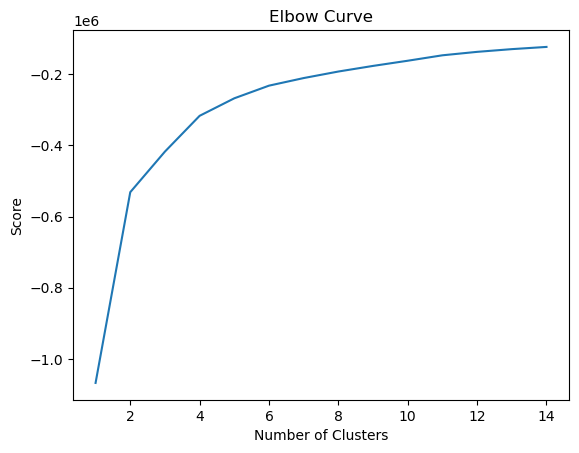

In [13]:
# Visualise the elbow.
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Number of clusters to use:

The graph shows that 4 is the number of clusters where the line starts to flatten. However. there is still a second subtle 
curve near number 6, where it flattens further. Due to this phenomena, I will use the value of 5 (in between them) to cluster.

K-means clustering

In [14]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [15]:
# Fitting the k-means object to the data.

kmeans.fit(df1)

C:\Users\Paola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [16]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\Paola\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Paola\AppData\Local\Temp\ipykernel_6212\865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [17]:
# Checking the results
df1.head()

,passenger_count,trip_distance,fare_amount,tip_amount,clusters
0,1,2.50,9.0,2.05,2
1,1,2.90,11.0,3.05,1
2,1,0.70,5.5,2.00,3
3,2,0.54,4.0,0.00,3
4,1,1.70,8.0,0.00,2


In [18]:
# Checking the values in the cluster column
df1['clusters'].value_counts()

3    25196
2    22367
1    14706
0     7449
4     5536
Name: clusters, dtype: int64

Starting visual plotting of the data

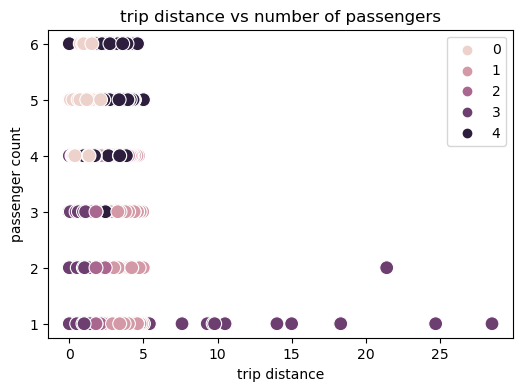

In [25]:
# Plotting the clusters for the "trip distance" and "passenger count" variables.

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=df1['trip_distance'], y=df1['passenger_count'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.title('trip distance vs number of passengers')
plt.xlabel('trip distance') # Label x-axis.
plt.ylabel('passenger count') # Label y-axis.
plt.show()

All clusters are situated in short trips, which seems it is the predominant use passengers (alone or in groups) give to Uber. It is worth noting that for all longer trips, it is mostly one passenger per trip.

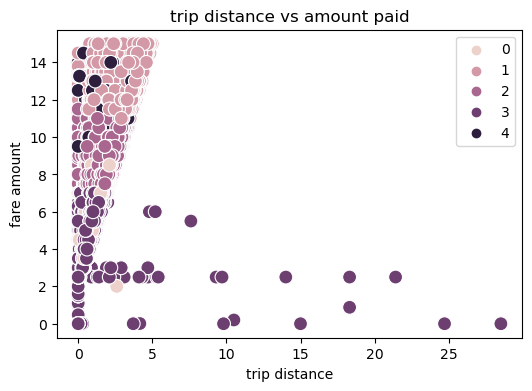

In [24]:
# Plotting the clusters for the "trip distance" and "fare count" variables.

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=df1['trip_distance'], y=df1['fare_amount'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.title('trip distance vs amount paid')
plt.xlabel('trip distance') # Label x-axis.
plt.ylabel('fare amount') # Label y-axis.
plt.show()

The trend is clear that the fare amoutn rises as the trip is longer. However, the plot shows many entries where the trip was considerably long, but actually much cheaper than other trips. It is logical to conclude that trip distance alone is not the factor to determine the fare for the trip.

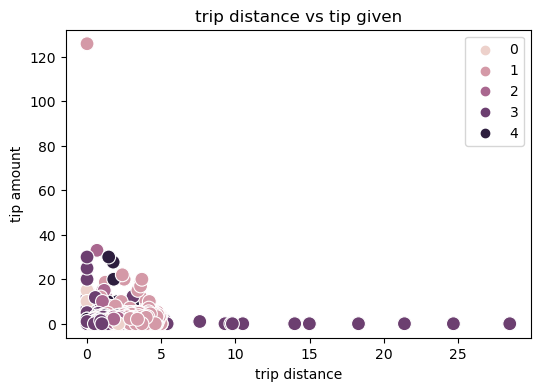

In [23]:
# Plotting the clusters for the "trip distance" and "tip" variables.

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=df1['trip_distance'], y=df1['tip_amount'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.title('trip distance vs tip given')
plt.xlabel('trip distance') # Label x-axis.
plt.ylabel('tip amount') # Label y-axis.
plt.show()

Most tips given do not exceed $10-15 dollars. The darker clusters (2 and 3 - over 60% of the data) indicate that in most case no more than $10 dollars were given. The $120 mark is an outliers which seems wrong, but worth looking into it.

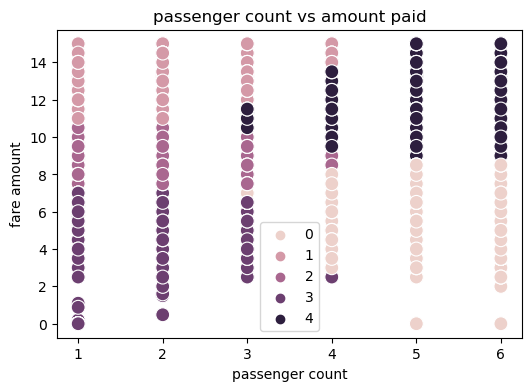

In [26]:
# Plotting the clusters for the "passenger count" and "fare count" variables.

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=df1['passenger_count'], y=df1['fare_amount'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.title('passenger count vs amount paid')
plt.xlabel('passenger count') # Label x-axis.
plt.ylabel('fare amount') # Label y-axis.
plt.show()

60% of the trips had up to 3 passengers (but mostly 1 or 2) and costed up to 10 dollars. A further 20% (same number of passengers) costed up to $15. Fewer than 20% of the trips had more than 3 passengers, and seem to be equally divided between cheaper trips (up to $8 dollars) and 'more expensive' trips (over $8 dollars).

Calculating statistics

In [28]:
df1.loc[df1['clusters'] == 3, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'light purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'pink'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'light pink'
df1.loc[df1['clusters'] == 4, 'cluster'] = 'dark purple'

C:\Users\Paola\AppData\Local\Temp\ipykernel_6212\2947331405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['clusters'] == 3, 'cluster'] = 'purple'


In [30]:
df1.groupby('cluster').agg({'passenger_count':['mean', 'median'], 
                         'trip_distance':['mean', 'median'], 
                         'fare_amount':['mean', 'median'],
                          'tip_amount':['mean', 'median']})

passenger_count        trip_distance        fare_amount         \
                        mean median          mean median        mean median   
cluster                                                                       
dark purple         5.174314    5.0      2.059642   1.96   11.403958   11.0   
light pink          5.212914    5.0      0.970861   0.94    6.318700    6.5   
light purple        1.260071    1.0      1.567520   1.52    8.922642    9.0   
pink                1.266966    1.0      2.535592   2.46   12.783228   12.5   
purple              1.246230    1.0      0.829028   0.80    5.455548    5.5   

             tip_amount         
                   mean median  
cluster                         
dark purple    1.625286   2.00  
light pink     0.893315   1.00  
light purple   1.207448   1.50  
pink           1.811417   2.36  
purple         0.764855   1.00

Most groups trips (4 passengers or more) are situated in the dark purple and light pink groups. This is why their passenger stats are much higher than the other groups (mostly 1 to 2 passengers).

The dark purple and light pink have the best stats, but they are not representative of the data as they are less than 20%, since they appear mainly in group trips (4 or more passengers), and this seems to be uncommon. 

The majority of trips (over 70%) seem to be very short: an average of between 0.8 and 1.6 miles. This means most users see Uber as a tool for short trips only.

It seems that - accross all groups - the standard tip per trip is about 13-14% of the fare. This could help forecast a total amount for a trip, based on the fare paid for it.

Points for further analysis.

These stats could help focus the analysis: For example, by knowing that most trips are short and taken by one or two passengers, this could help narrow down the analysis to get clearer results. This could also help forecast usage and how data would change if costs rise.